In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the index dataset
index_data = pd.read_csv('sp500_index.csv', parse_dates=['Date'], index_col='Date')

# Load the company dataset
companies_data = pd.read_csv('sp500_companies.csv')

# Assign synthetic dates to the company dataset
companies_data['Date'] = pd.date_range(start=index_data.index.min(), periods=len(companies_data), freq='D')
companies_data.set_index('Date', inplace=True)

# Merge the datasets on the Date index
combined_data = companies_data.join(index_data, how='inner')

# Display the merged data
print("\nCombined Data:")
print(combined_data.head())


Combined Data:
           Exchange Symbol              Shortname               Longname  \
Date                                                                       
2014-11-24      NMS   AAPL             Apple Inc.             Apple Inc.   
2014-11-25      NMS   NVDA     NVIDIA Corporation     NVIDIA Corporation   
2014-11-26      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
2014-11-28      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   
2014-12-01      NMS   TSLA            Tesla, Inc.            Tesla, Inc.   

                            Sector                        Industry  \
Date                                                                 
2014-11-24              Technology            Consumer Electronics   
2014-11-25              Technology                  Semiconductors   
2014-11-26              Technology       Software - Infrastructure   
2014-11-28  Communication Services  Internet Content & Information   
2014-12-01       Consumer Cycli

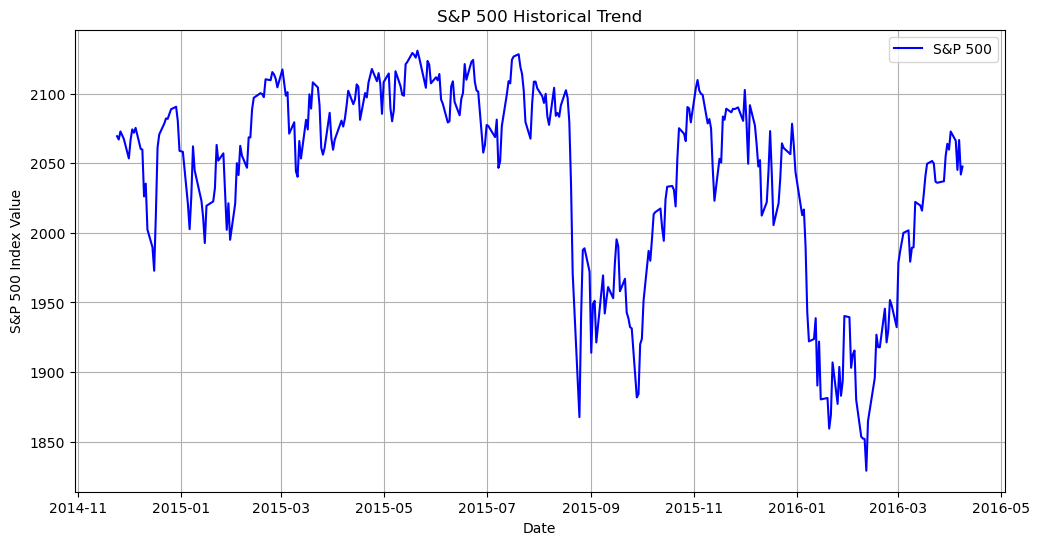

In [8]:
import matplotlib.pyplot as plt

# Plot S&P 500 over time
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['S&P500'], label='S&P 500', color='blue')

# Customize the plot
plt.title('S&P 500 Historical Trend')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index Value')
plt.legend()
plt.grid(True)
plt.show()

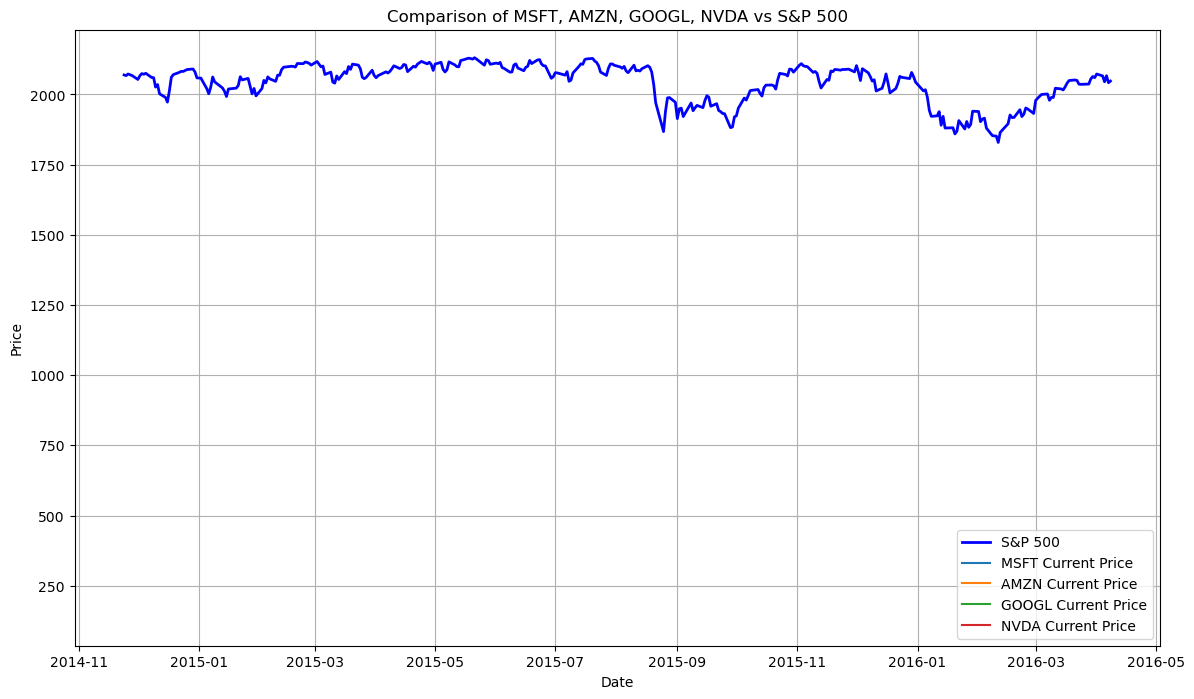

In [9]:
import matplotlib.pyplot as plt

# Filter the data for the selected companies
selected_companies = ['MSFT', 'AMZN', 'GOOGL', 'NVDA']
filtered_data = combined_data[combined_data['Symbol'].isin(selected_companies)]

# Plot S&P 500
plt.figure(figsize=(14, 8))
plt.plot(combined_data.index, combined_data['S&P500'], label='S&P 500', color='blue', linewidth=2)

# Plot each company's current price
for company in selected_companies:
    company_data = filtered_data[filtered_data['Symbol'] == company]
    plt.plot(company_data.index, company_data['Currentprice'], label=f'{company} Current Price')

# Customize the plot
plt.title('Comparison of MSFT, AMZN, GOOGL, NVDA vs S&P 500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

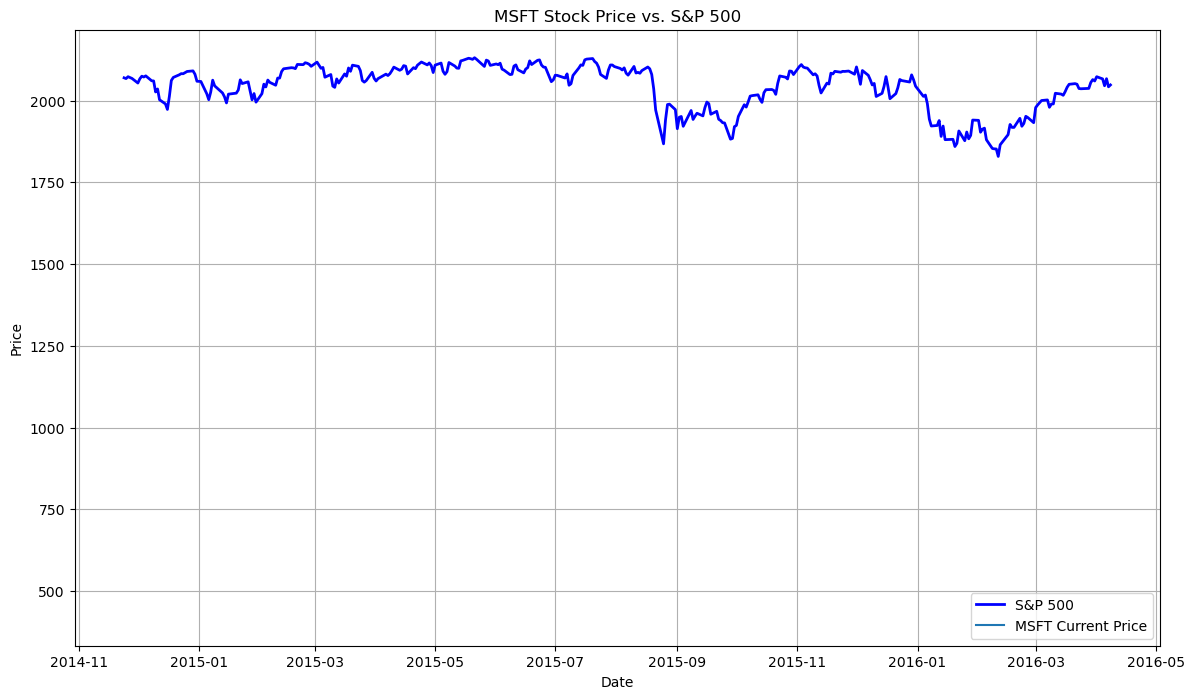

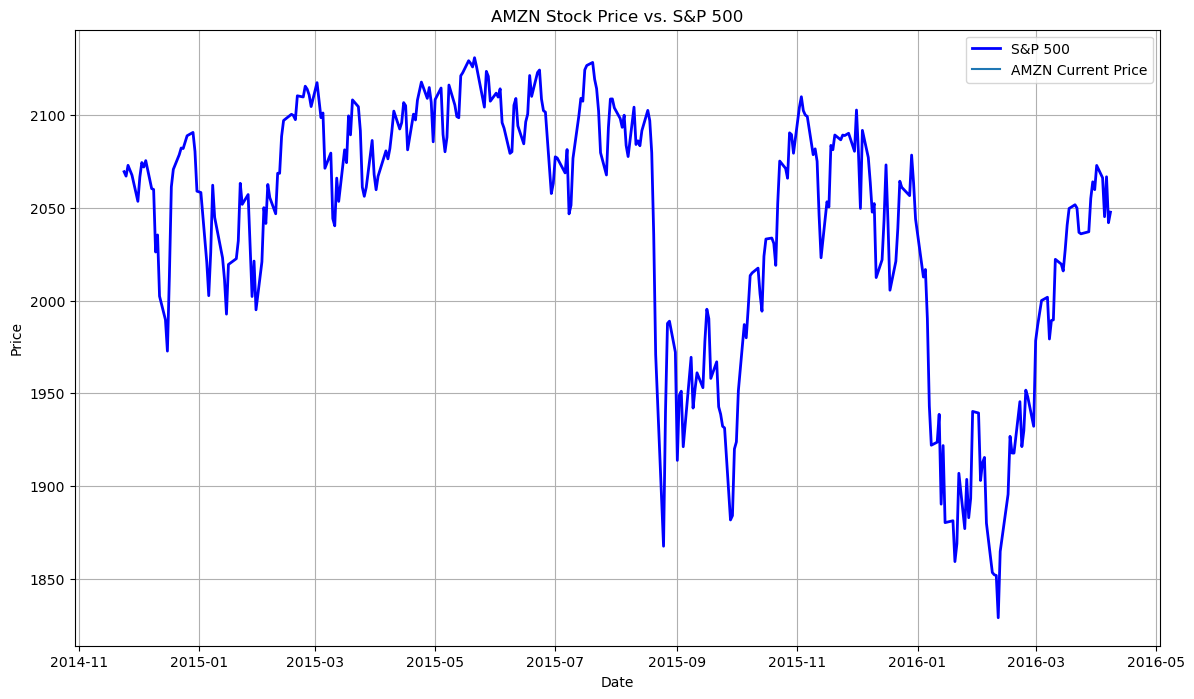

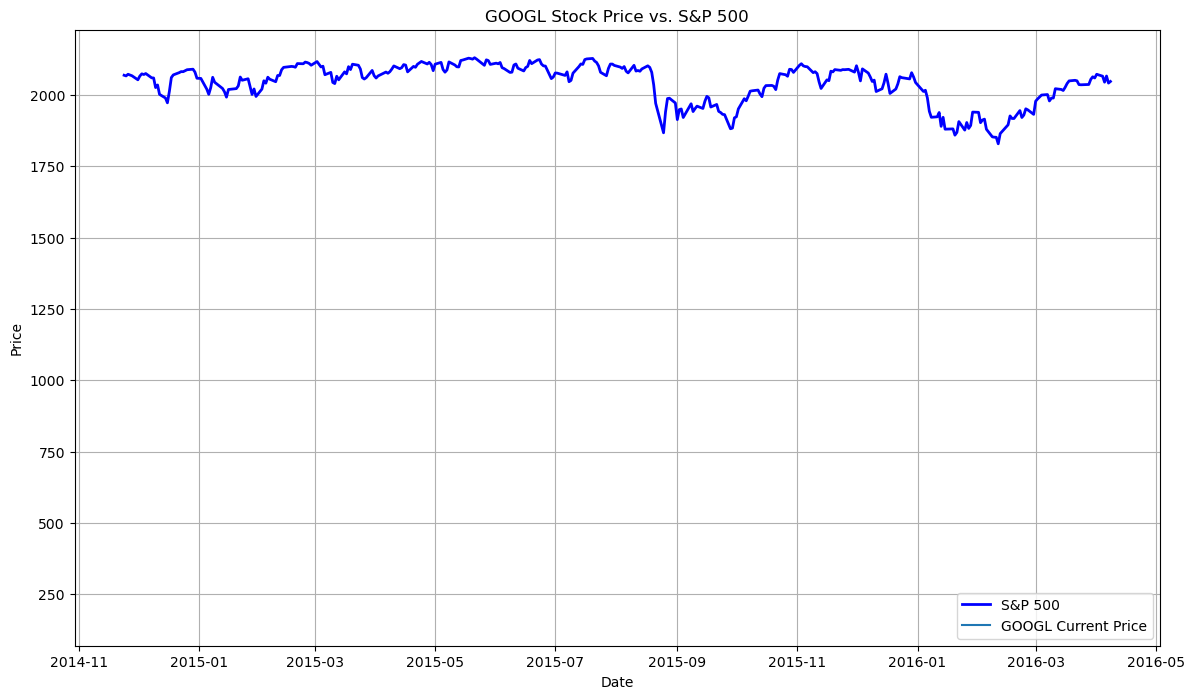

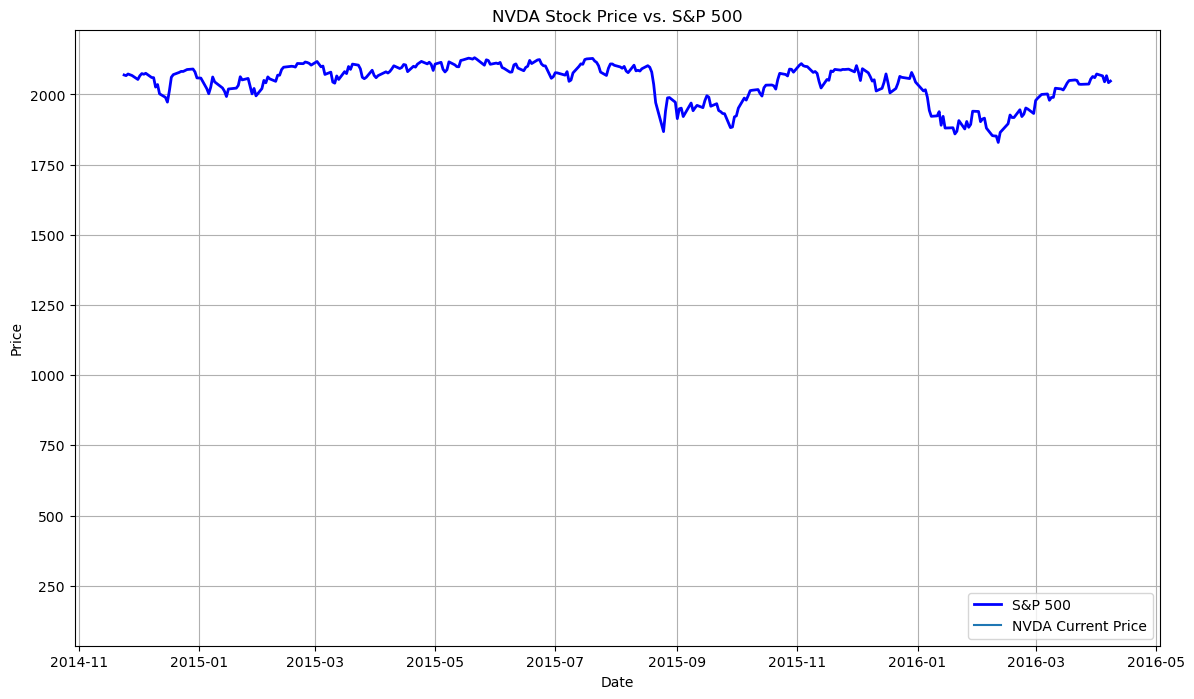

In [10]:
import matplotlib.pyplot as plt

# List of selected companies
selected_companies = ['MSFT', 'AMZN', 'GOOGL', 'NVDA']

# Loop through each company and create a separate plot
for company in selected_companies:
    plt.figure(figsize=(14, 8))
    
    # Filter data for the current company
    company_data = combined_data[combined_data['Symbol'] == company]
    
    # Plot S&P 500
    plt.plot(combined_data.index, combined_data['S&P500'], label='S&P 500', color='blue', linewidth=2)
    
    # Plot the company's current price
    plt.plot(company_data.index, company_data['Currentprice'], label=f'{company} Current Price')
    
    # Customize the plot
    plt.title(f'{company} Stock Price vs. S&P 500')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Show each individual graph
    plt.show()

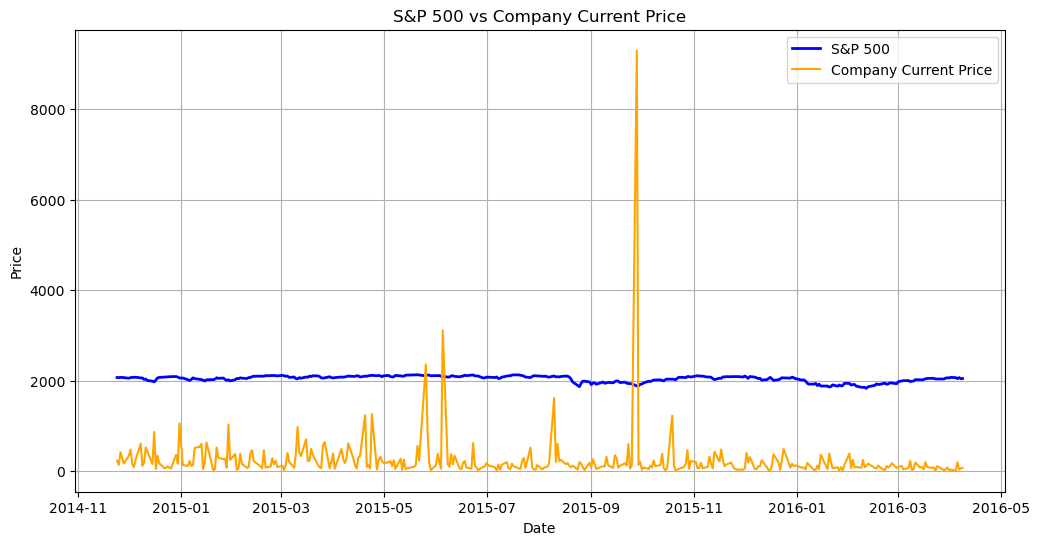

In [11]:
import matplotlib.pyplot as plt

# Plot S&P 500 vs Company's Current Price (Example: MSFT)
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['S&P500'], label='S&P 500', color='blue', linewidth=2)
plt.plot(combined_data.index, combined_data['Currentprice'], label='Company Current Price', color='orange')

plt.title('S&P 500 vs Company Current Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

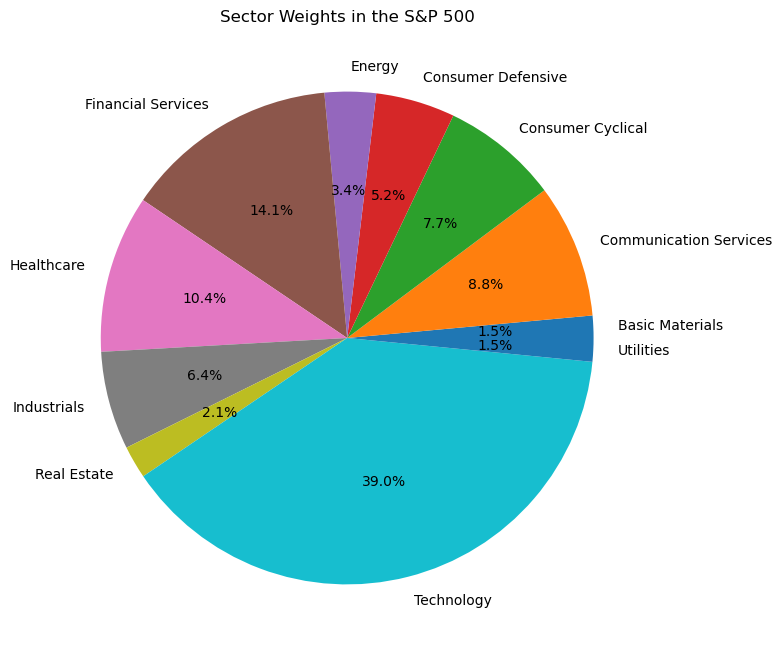

In [12]:
# Calculate sector-wise weight
sector_weights = combined_data.groupby('Sector')['Weight'].sum()

# Plot pie chart
sector_weights.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sector Weights in the S&P 500')
plt.ylabel('')  # Remove default y-axis label
plt.show()

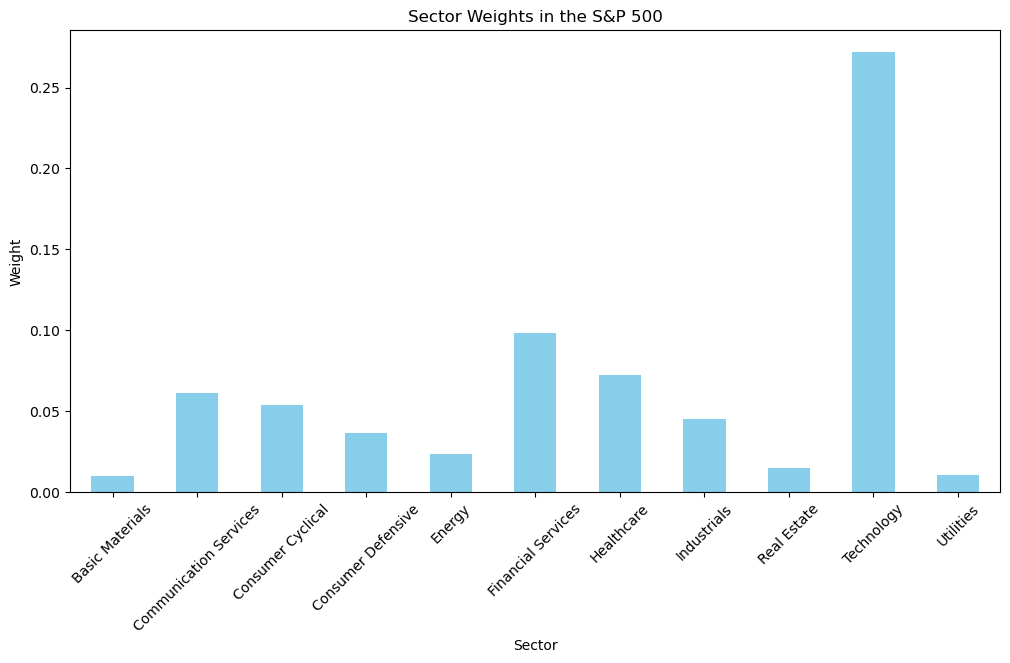

In [13]:
# Plot bar chart of sector weights
sector_weights.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Sector Weights in the S&P 500')
plt.xlabel('Sector')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

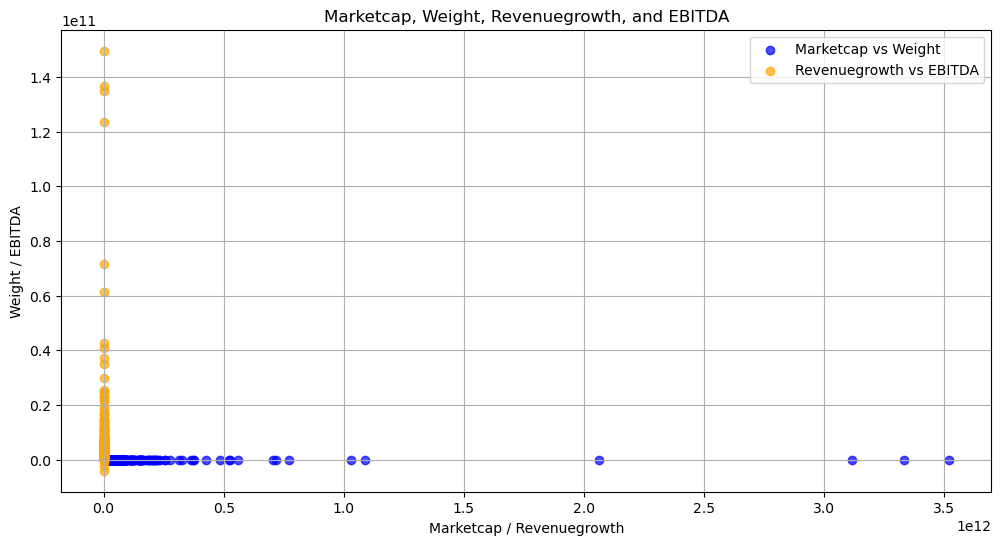

In [14]:
# Scatter plot comparing Marketcap and Weight
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['Marketcap'], combined_data['Weight'], alpha=0.7, color='blue', label='Marketcap vs Weight')
plt.scatter(combined_data['Revenuegrowth'], combined_data['Ebitda'], alpha=0.7, color='orange', label='Revenuegrowth vs EBITDA')
plt.title('Marketcap, Weight, Revenuegrowth, and EBITDA')
plt.xlabel('Marketcap / Revenuegrowth')
plt.ylabel('Weight / EBITDA')
plt.legend()
plt.grid(True)
plt.show()

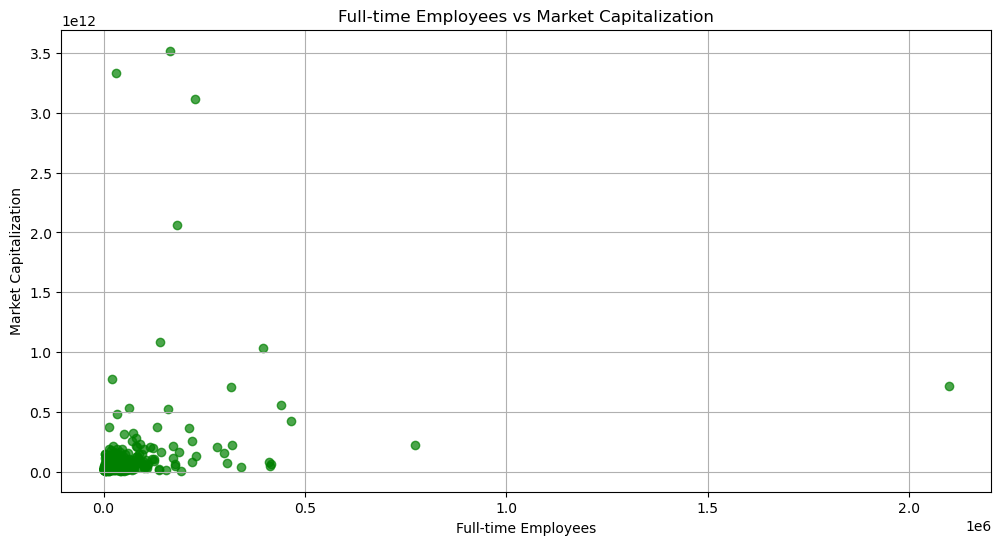

In [15]:
# Scatter plot of Full-time employees vs Market Cap
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['Fulltimeemployees'], combined_data['Marketcap'], alpha=0.7, color='green')
plt.title('Full-time Employees vs Market Capitalization')
plt.xlabel('Full-time Employees')
plt.ylabel('Market Capitalization')
plt.grid(True)
plt.show()

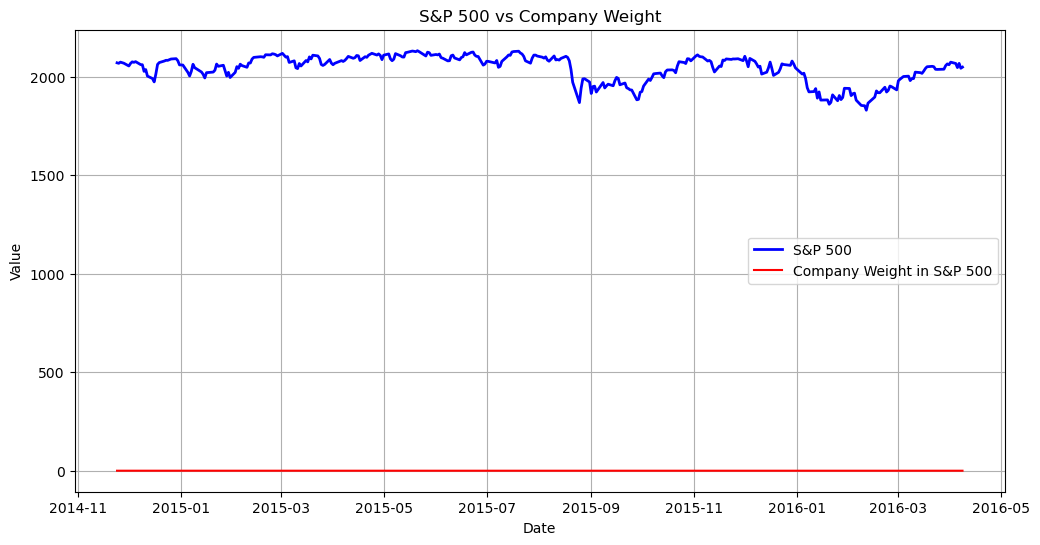

In [16]:
# Plot S&P 500 vs Company's Weight
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['S&P500'], label='S&P 500', color='blue', linewidth=2)
plt.plot(combined_data.index, combined_data['Weight'], label='Company Weight in S&P 500', color='red')

plt.title('S&P 500 vs Company Weight')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

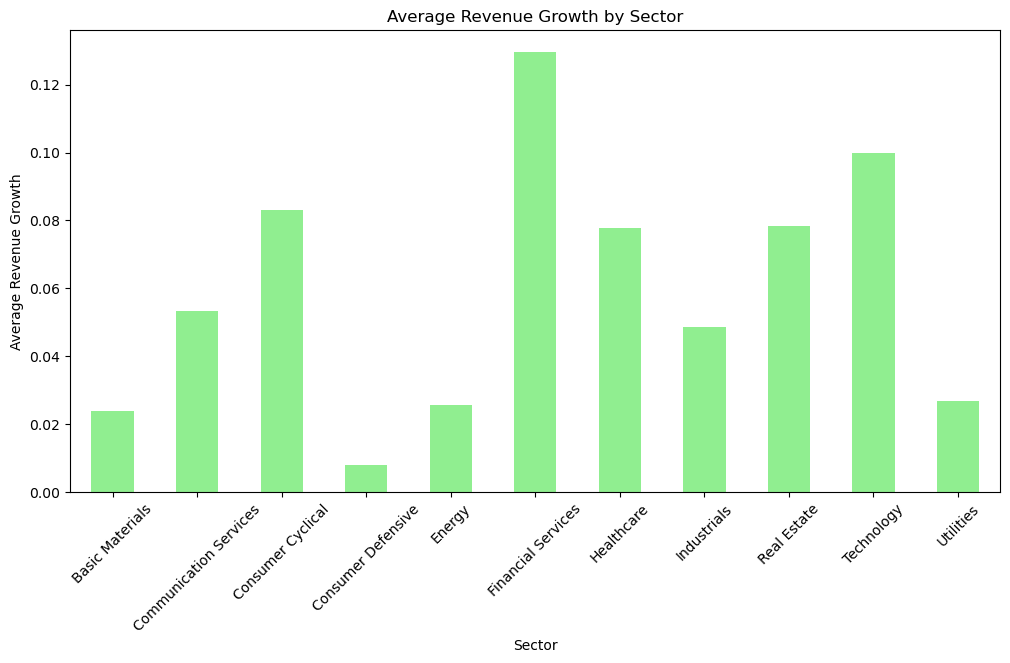

In [17]:
# Calculate average revenue growth by sector
sector_revenue_growth = combined_data.groupby('Sector')['Revenuegrowth'].mean()
# Plot bar chart
sector_revenue_growth.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Average Revenue Growth by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Revenue Growth')
plt.xticks(rotation=45)
plt.show()

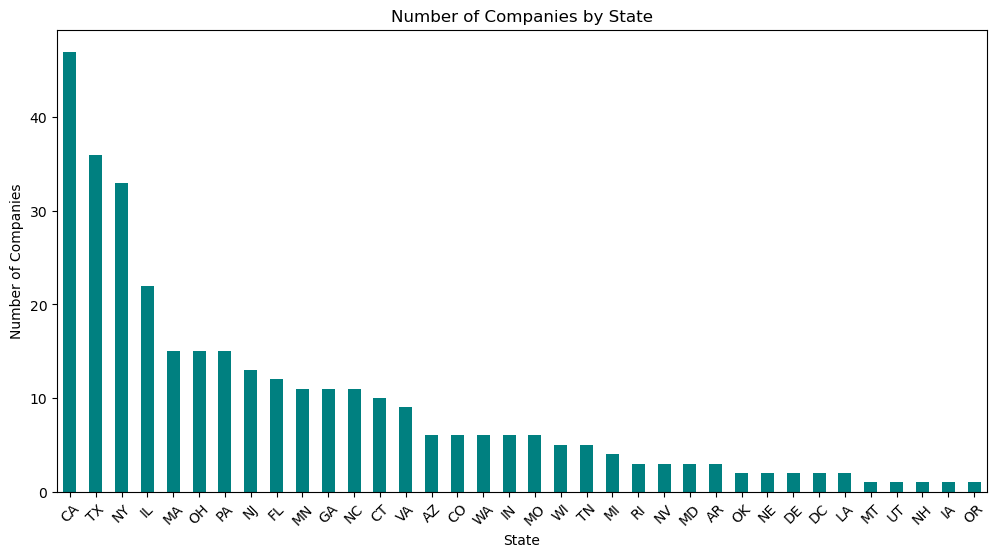

In [18]:
# Count the number of companies by State
state_counts = combined_data['State'].value_counts()

# Plot bar chart
state_counts.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Number of Companies by State')
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

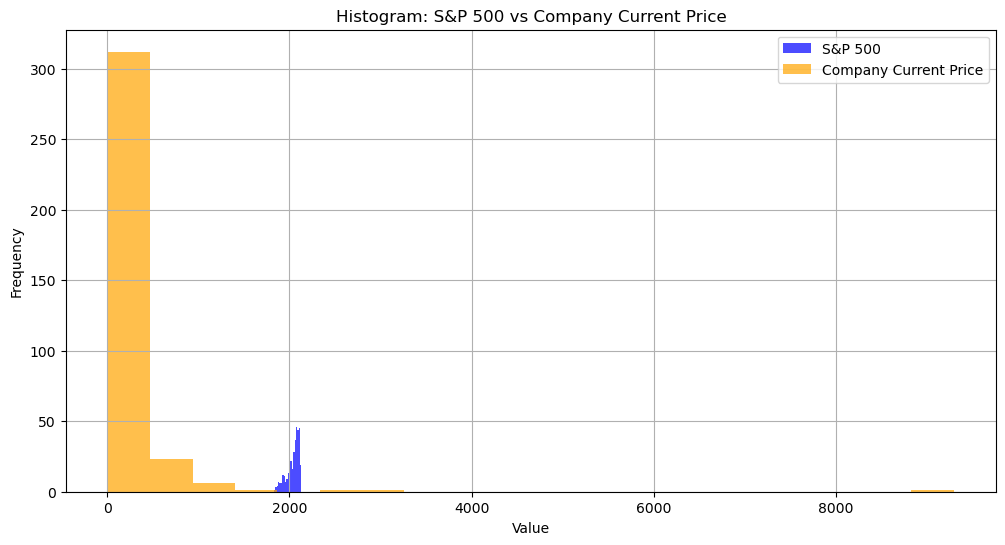

In [6]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(12, 6))

# Histogram for S&P 500 values
plt.hist(combined_data['S&P500'], bins=20, alpha=0.7, label='S&P 500', color='blue')

# Histogram for Current Price values
plt.hist(combined_data['Currentprice'], bins=20, alpha=0.7, label='Company Current Price', color='orange')

# Customize the plot
plt.title('Histogram: S&P 500 vs Company Current Price')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display the histogram
plt.show()

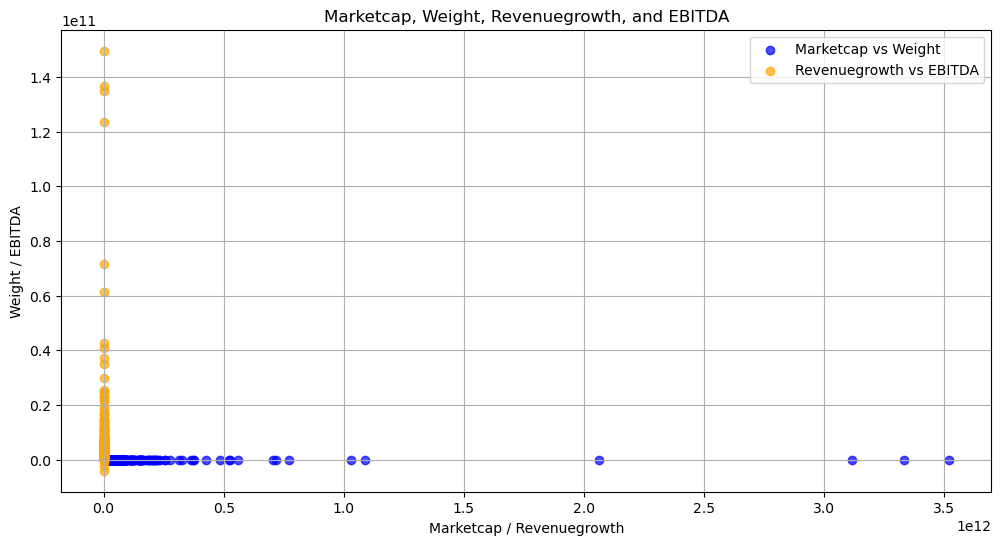

In [7]:
# Scatter plot comparing Marketcap and Weight
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['Marketcap'], combined_data['Weight'], alpha=0.7, color='blue', label='Marketcap vs Weight')
plt.scatter(combined_data['Revenuegrowth'], combined_data['Ebitda'], alpha=0.7, color='orange', label='Revenuegrowth vs EBITDA')
plt.title('Marketcap, Weight, Revenuegrowth, and EBITDA')
plt.xlabel('Marketcap / Revenuegrowth')
plt.ylabel('Weight / EBITDA')
plt.legend()
plt.grid(True)
plt.show()

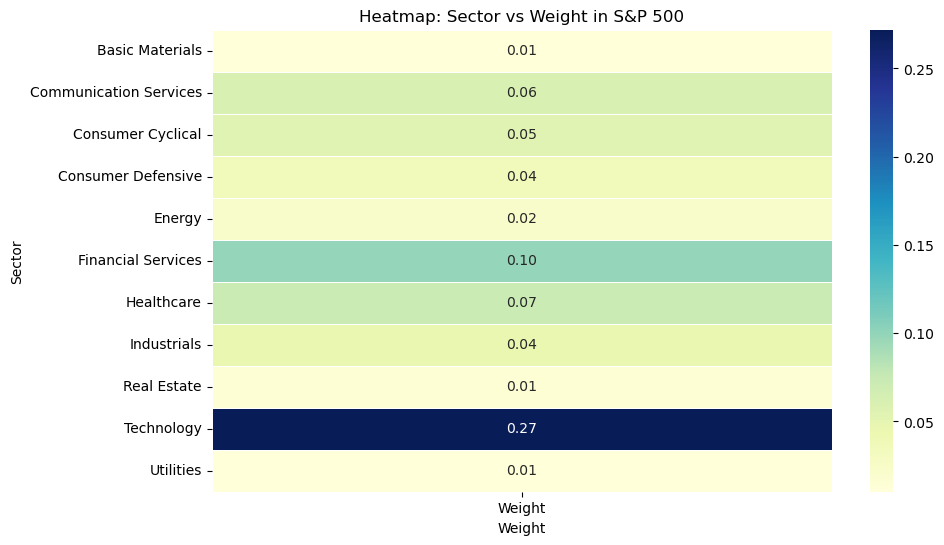

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate Weight by Sector
sector_weight = combined_data.groupby('Sector')['Weight'].sum().reset_index()

# Pivot the data for a heatmap (if needed for categories)
sector_weight_pivot = sector_weight.pivot_table(values='Weight', index='Sector')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sector_weight_pivot, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Heatmap: Sector vs Weight in S&P 500')
plt.xlabel('Weight')
plt.ylabel('Sector')
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


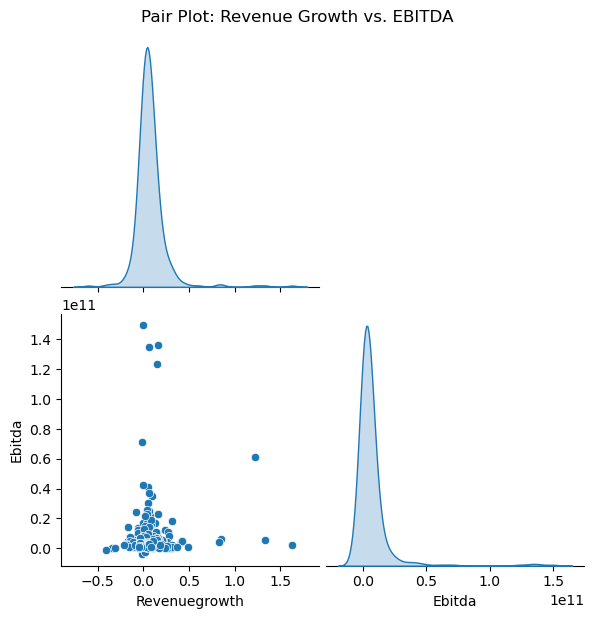

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
data_subset = combined_data[['Revenuegrowth', 'Ebitda']]

# Plot the pair plot
sns.pairplot(data=data_subset, diag_kind='kde', corner=True, height=3)

# Customize the plot
plt.suptitle('Pair Plot: Revenue Growth vs. EBITDA', y=1.02)
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


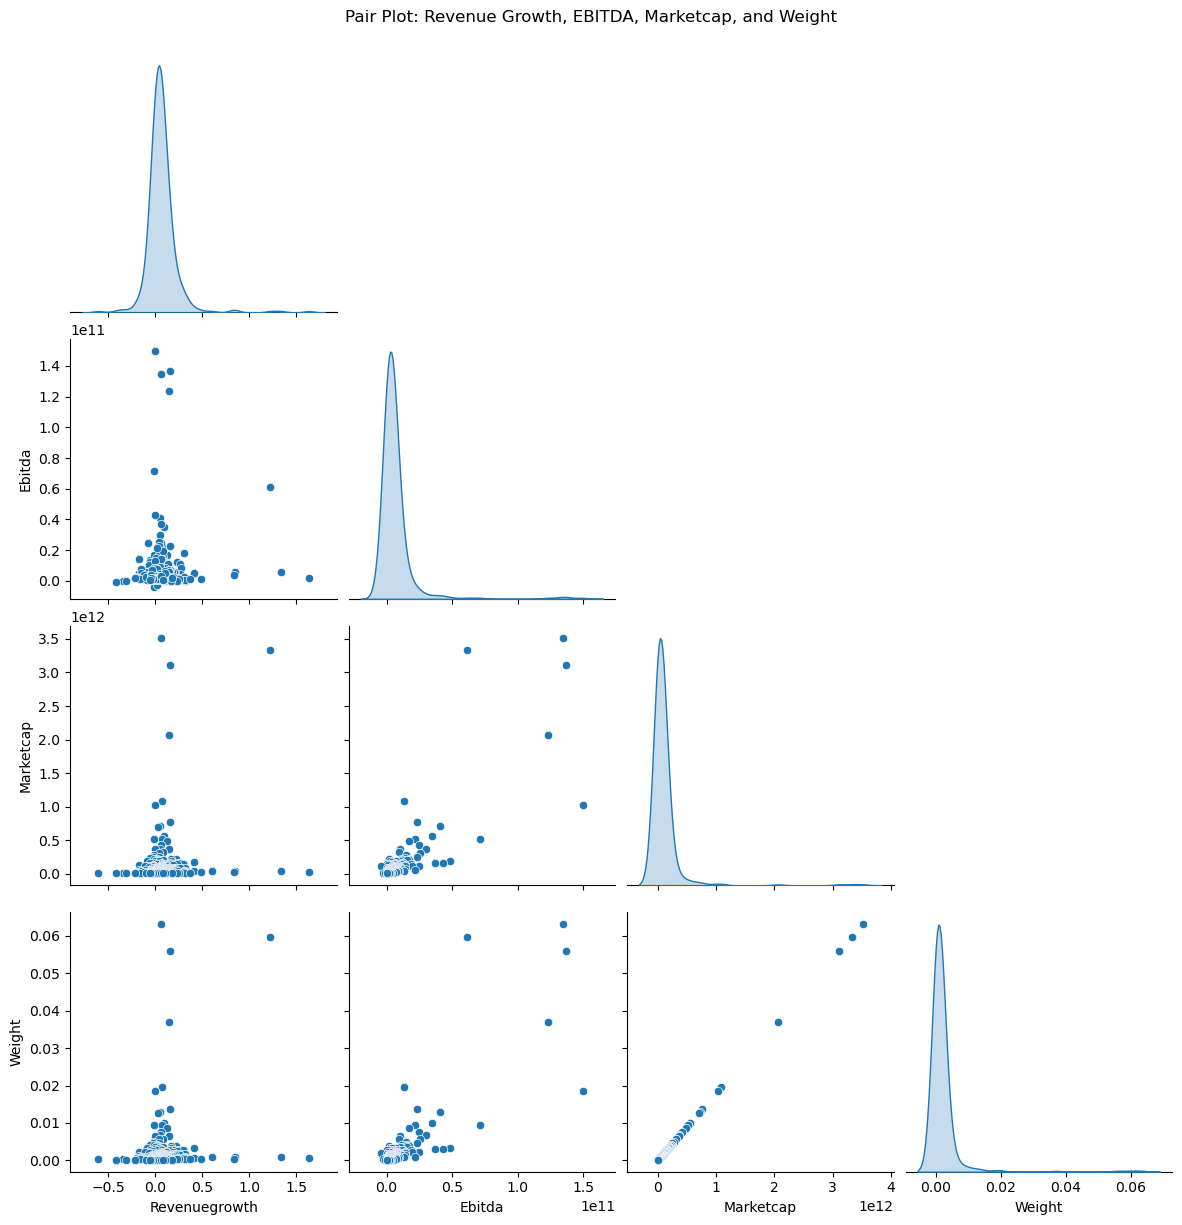

In [10]:
data_subset = combined_data[['Revenuegrowth', 'Ebitda', 'Marketcap', 'Weight']]
sns.pairplot(data=data_subset, diag_kind='kde', corner=True, height=3)
plt.suptitle('Pair Plot: Revenue Growth, EBITDA, Marketcap, and Weight', y=1.02)
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


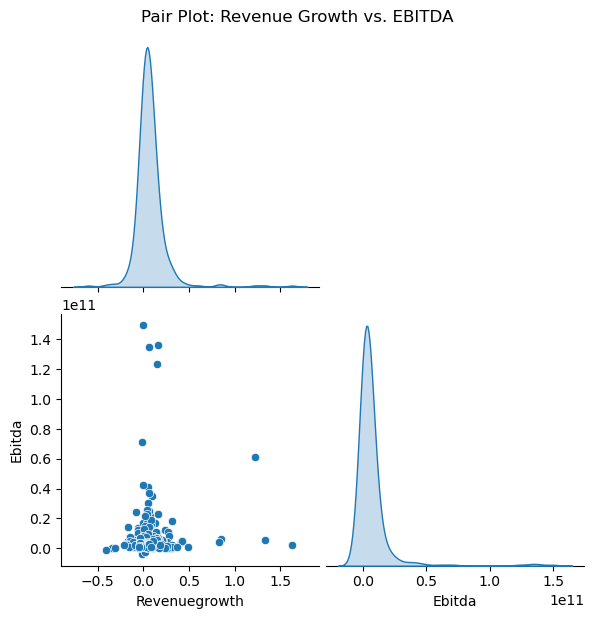

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


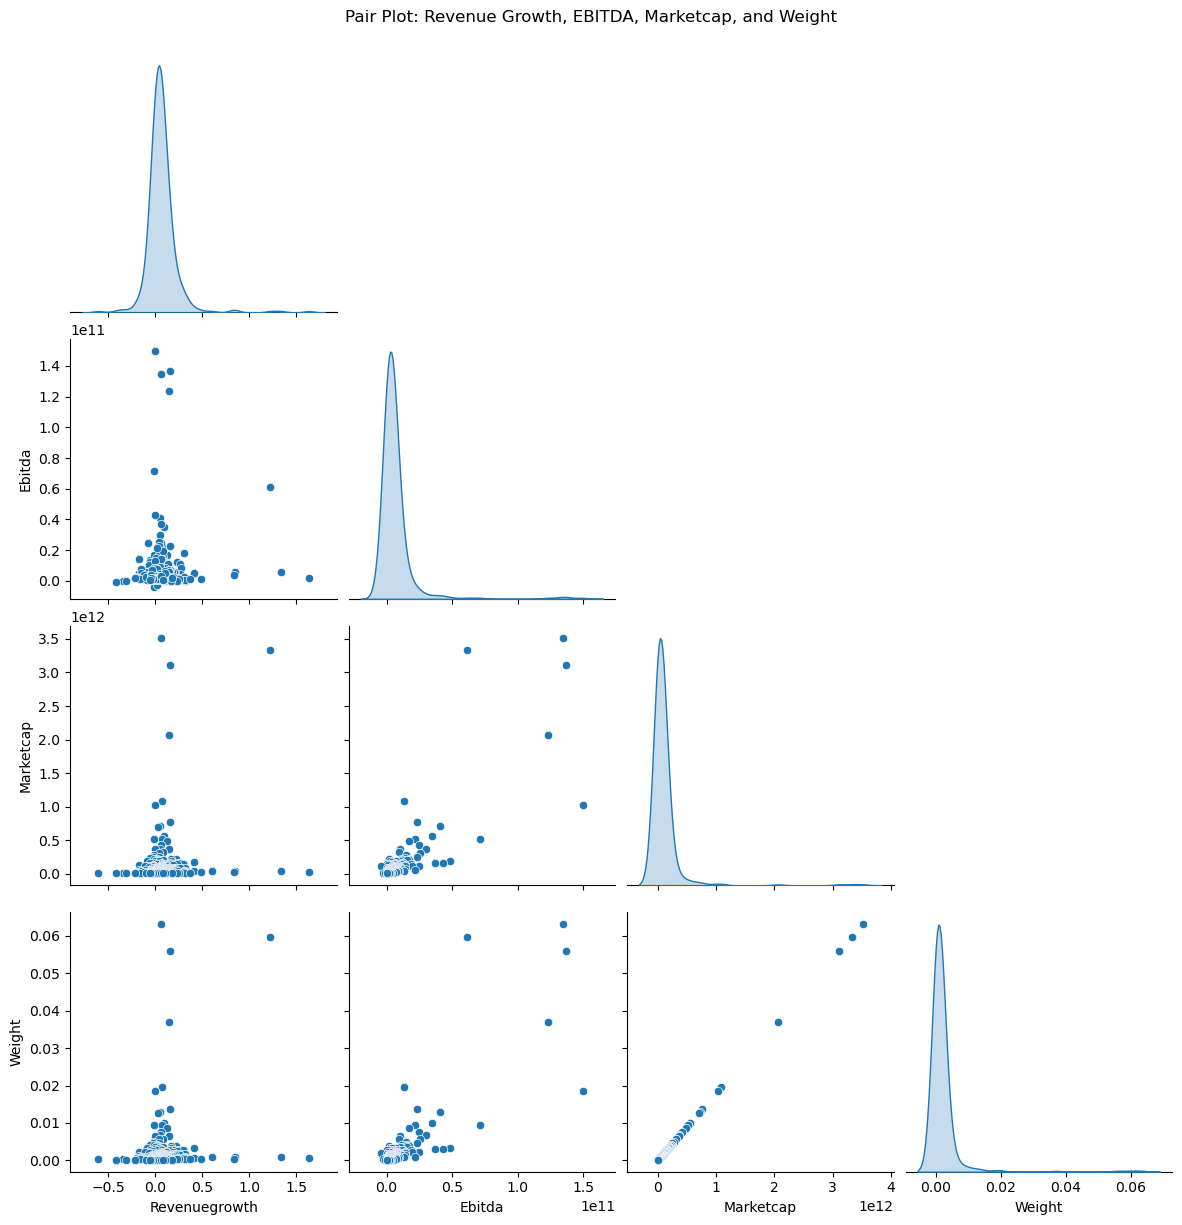

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
data_subset = combined_data[['Revenuegrowth', 'Ebitda']]

# Plot the pair plot
sns.pairplot(data=data_subset, diag_kind='kde', corner=True, height=3)

# Customize the plot
plt.suptitle('Pair Plot: Revenue Growth vs. EBITDA', y=1.02)
plt.show()
data_subset = combined_data[['Revenuegrowth', 'Ebitda', 'Marketcap', 'Weight']]
sns.pairplot(data=data_subset, diag_kind='kde', corner=True, height=3)
plt.suptitle('Pair Plot: Revenue Growth, EBITDA, Marketcap, and Weight', y=1.02)
plt.show()

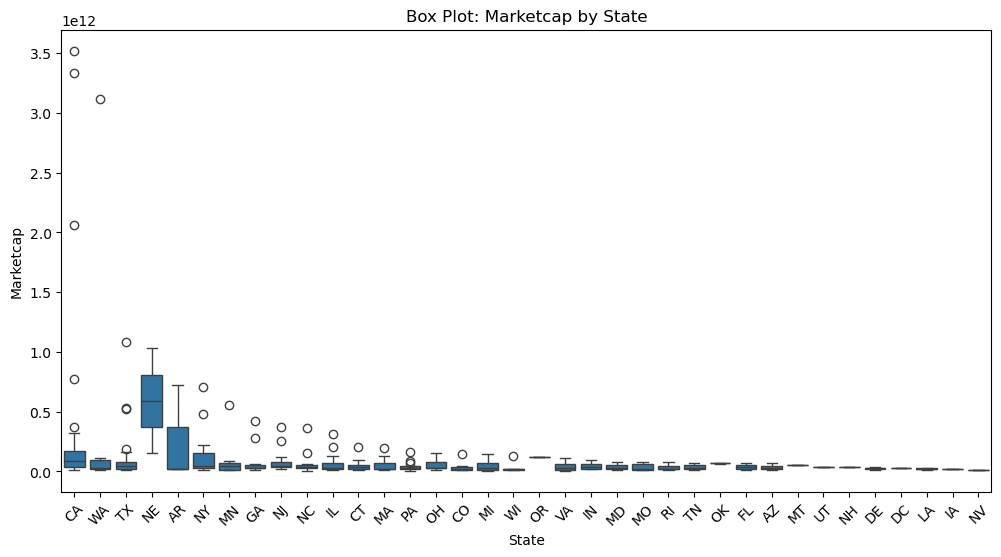

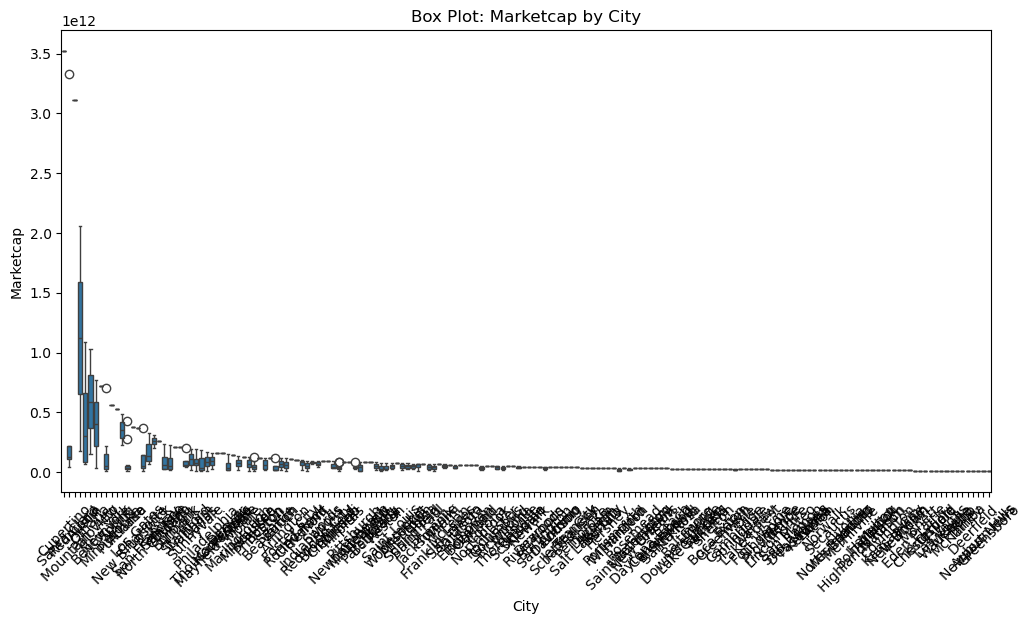

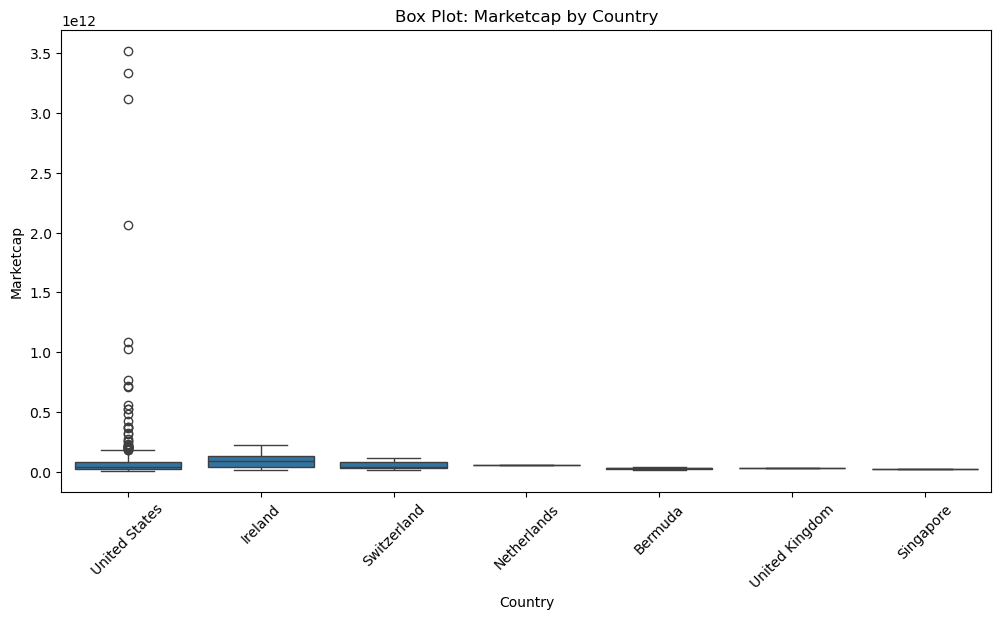

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Marketcap by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Marketcap', data=combined_data)
plt.title('Box Plot: Marketcap by State')
plt.xlabel('State')
plt.ylabel('Marketcap')
plt.xticks(rotation=45)
plt.show()

# Box plot for Marketcap by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Marketcap', data=combined_data)
plt.title('Box Plot: Marketcap by City')
plt.xlabel('City')
plt.ylabel('Marketcap')
plt.xticks(rotation=45)
plt.show()

# Box plot for Marketcap by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Marketcap', data=combined_data)
plt.title('Box Plot: Marketcap by Country')
plt.xlabel('Country')
plt.ylabel('Marketcap')
plt.xticks(rotation=45)
plt.show()